In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import rtlsdr
import numpy as np
import time
import RTLSDRTools as rst
from matplotlib.mlab import psd

In [3]:
def dB(array):
    
    return 10*np.log10(array)

In [20]:
reacquire = True
if reacquire:
    psd_array, freq_array = rst.Scan(verbose=True)
    np.savez('psd_array.npz', psd_array=psd_array)
    np.savez('freq_array.npz', freq_array=freq_array)
else:
    psd_array = np.load('psd_array.npz')['psd_array']
    freq_array = np.load('freq_array.npz')['freq_array']

Estimated time to scan 115.41258666666667 seconds
Length of scan 0.10922666666666667 seconds
Actual time to scan 121.1191828250885


<IPython.core.display.Javascript object>


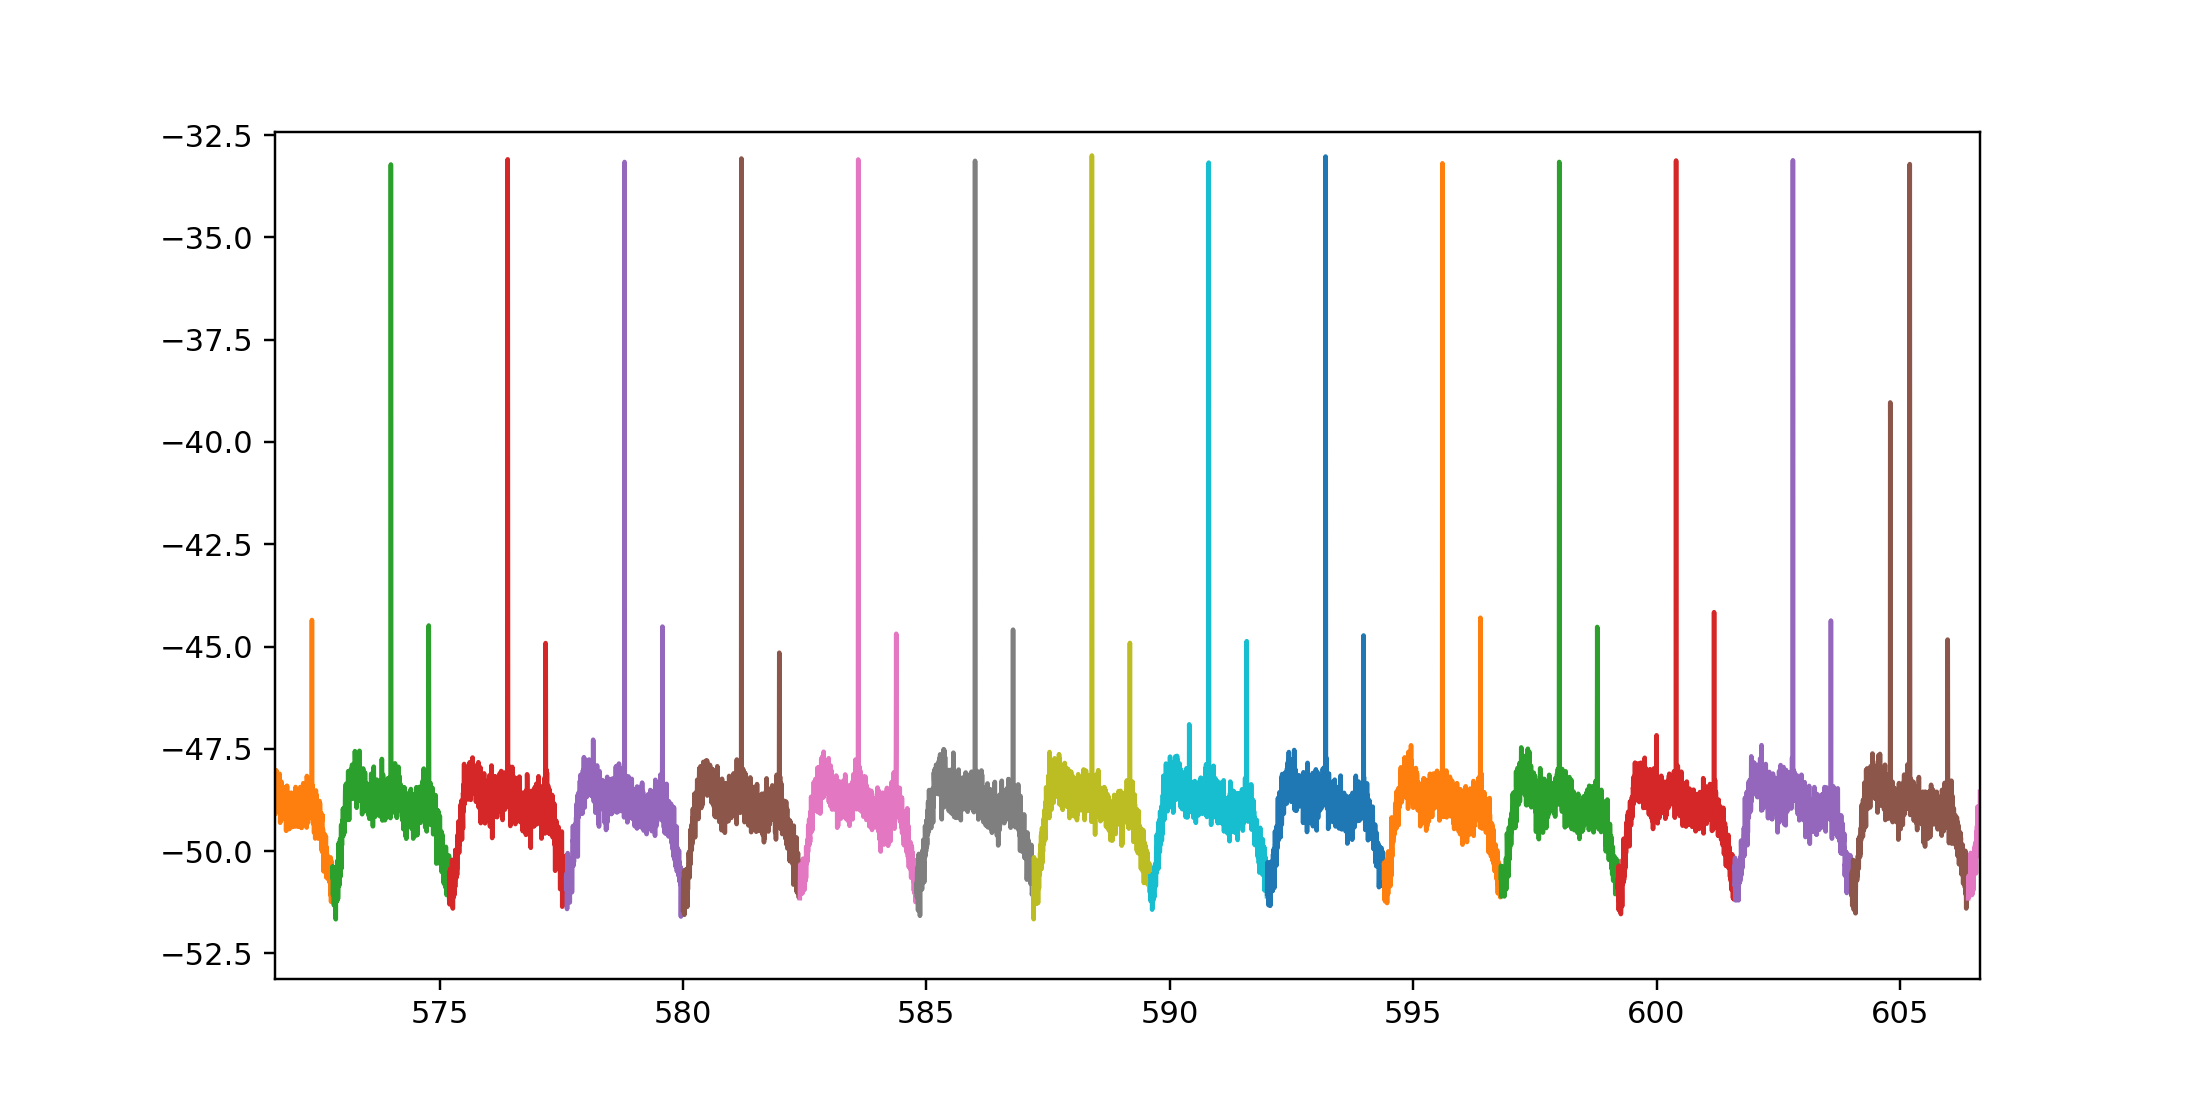

In [30]:
plt.figure(figsize=(10,5))
plt.plot(freq_array, dB(psd_array))
plt.show()

In [22]:
psd_all, freq_all, flags_all, bandpass = rst.CleanScan(psd_array, freq_array)

1024 682


<IPython.core.display.Javascript object>


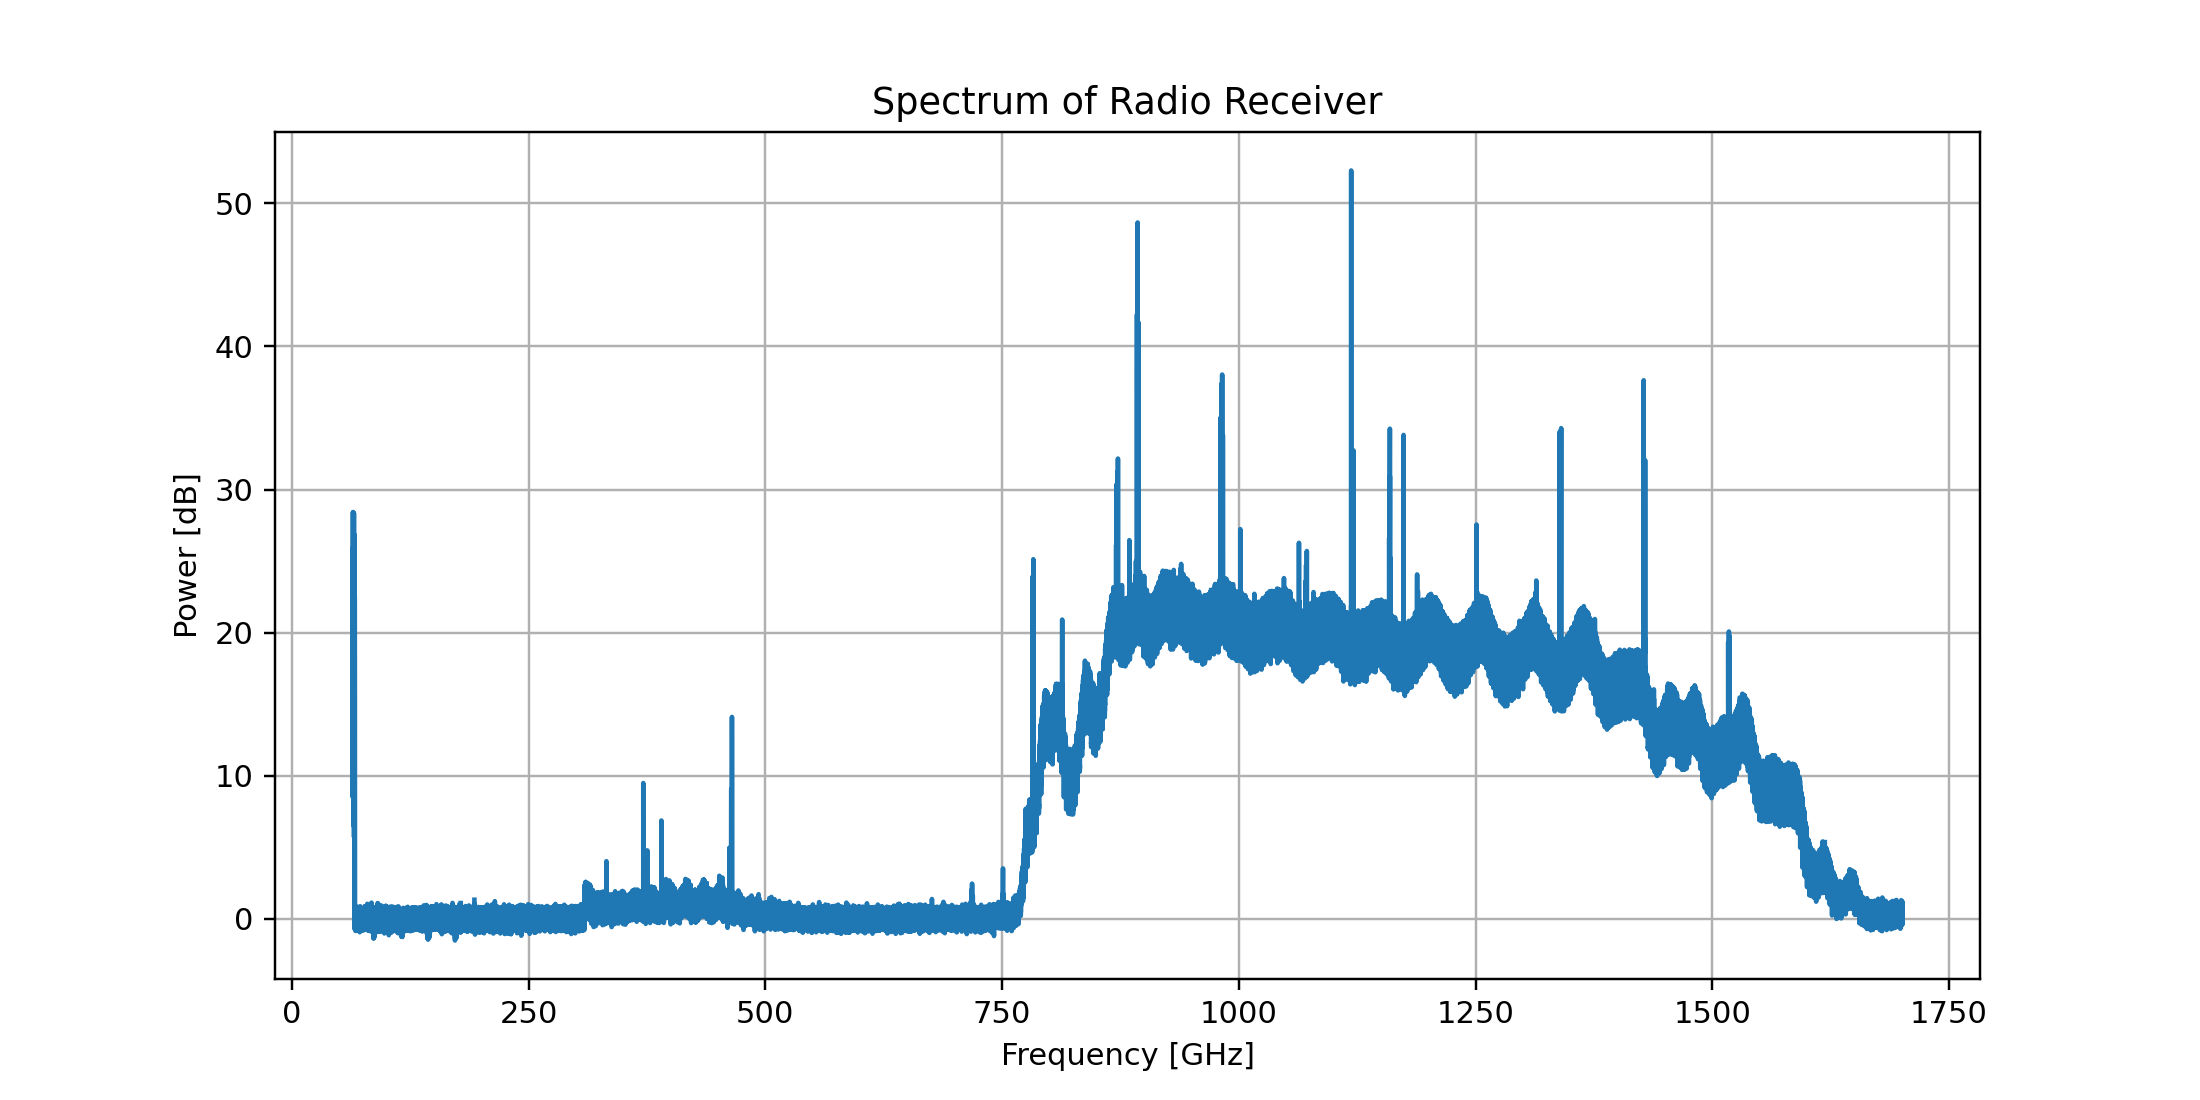

/Users/jaguirre/opt/anaconda3/envs/MRT/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
plt.figure(figsize=(10,5))
#plt.plot(freq_all, dB(psd_all))
plt.plot(freq_all, dB(psd_all/flags_all))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Power [dB]')
plt.title('Spectrum of Radio Receiver')
plt.grid()
plt.savefig('spectrum.png')
plt.show()

In [15]:
p1ant_array, f1ant_array = rst.Scan(verbose=True)

Estimated time to scan 115.41258666666667 seconds
Length of scan 0.10922666666666667 seconds
Actual time to scan 122.29195427894592


<IPython.core.display.Javascript object>


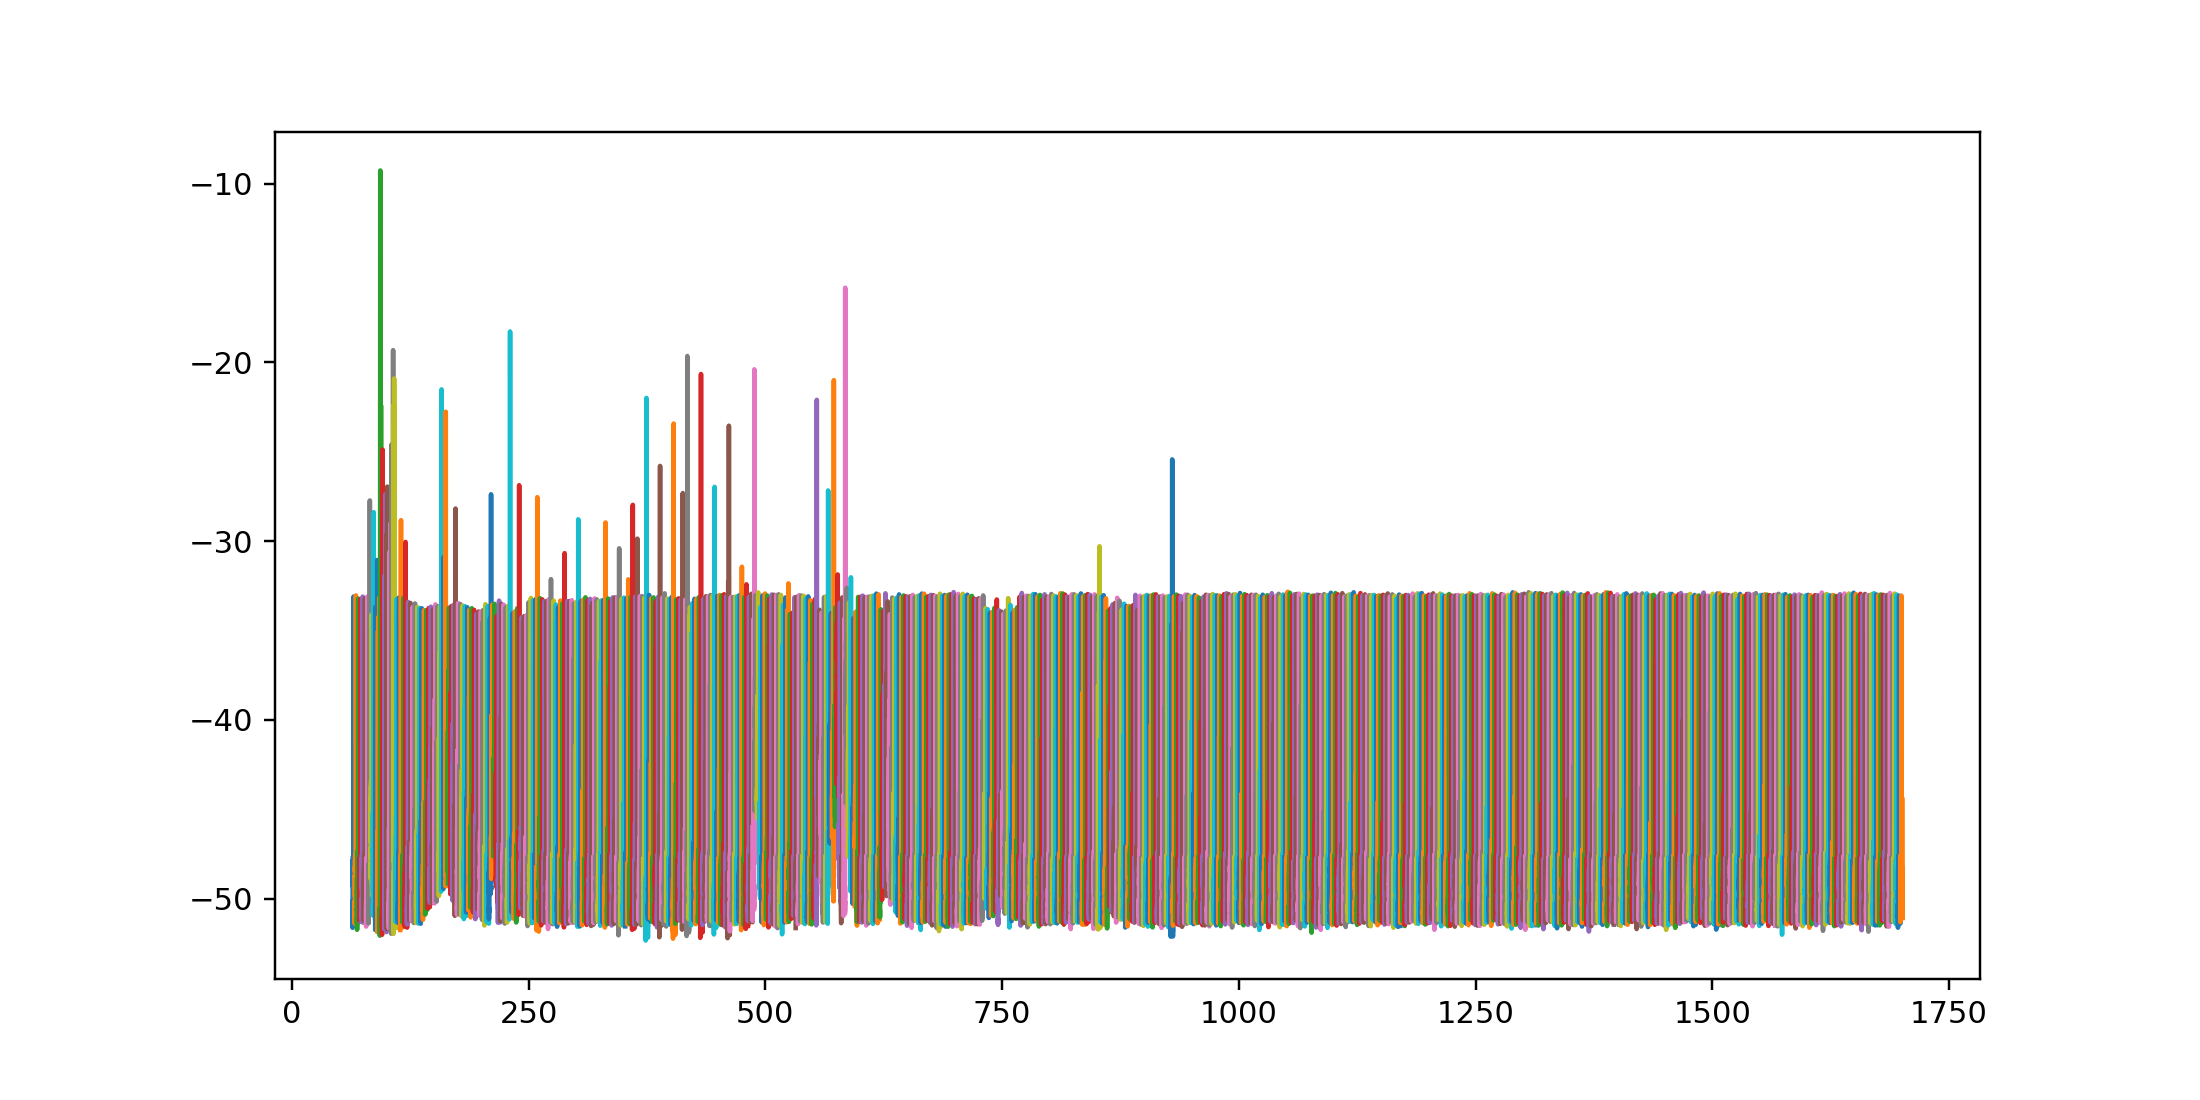

In [16]:
plt.figure(figsize=(10,5))
plt.plot(f1ant_array, dB(p1ant_array))
plt.show()

In [17]:
p1ant_all, f1ant_all, fl1ant_all, bandpass = rst.CleanScan(p1ant_array, f1ant_array)

1024 682


<IPython.core.display.Javascript object>


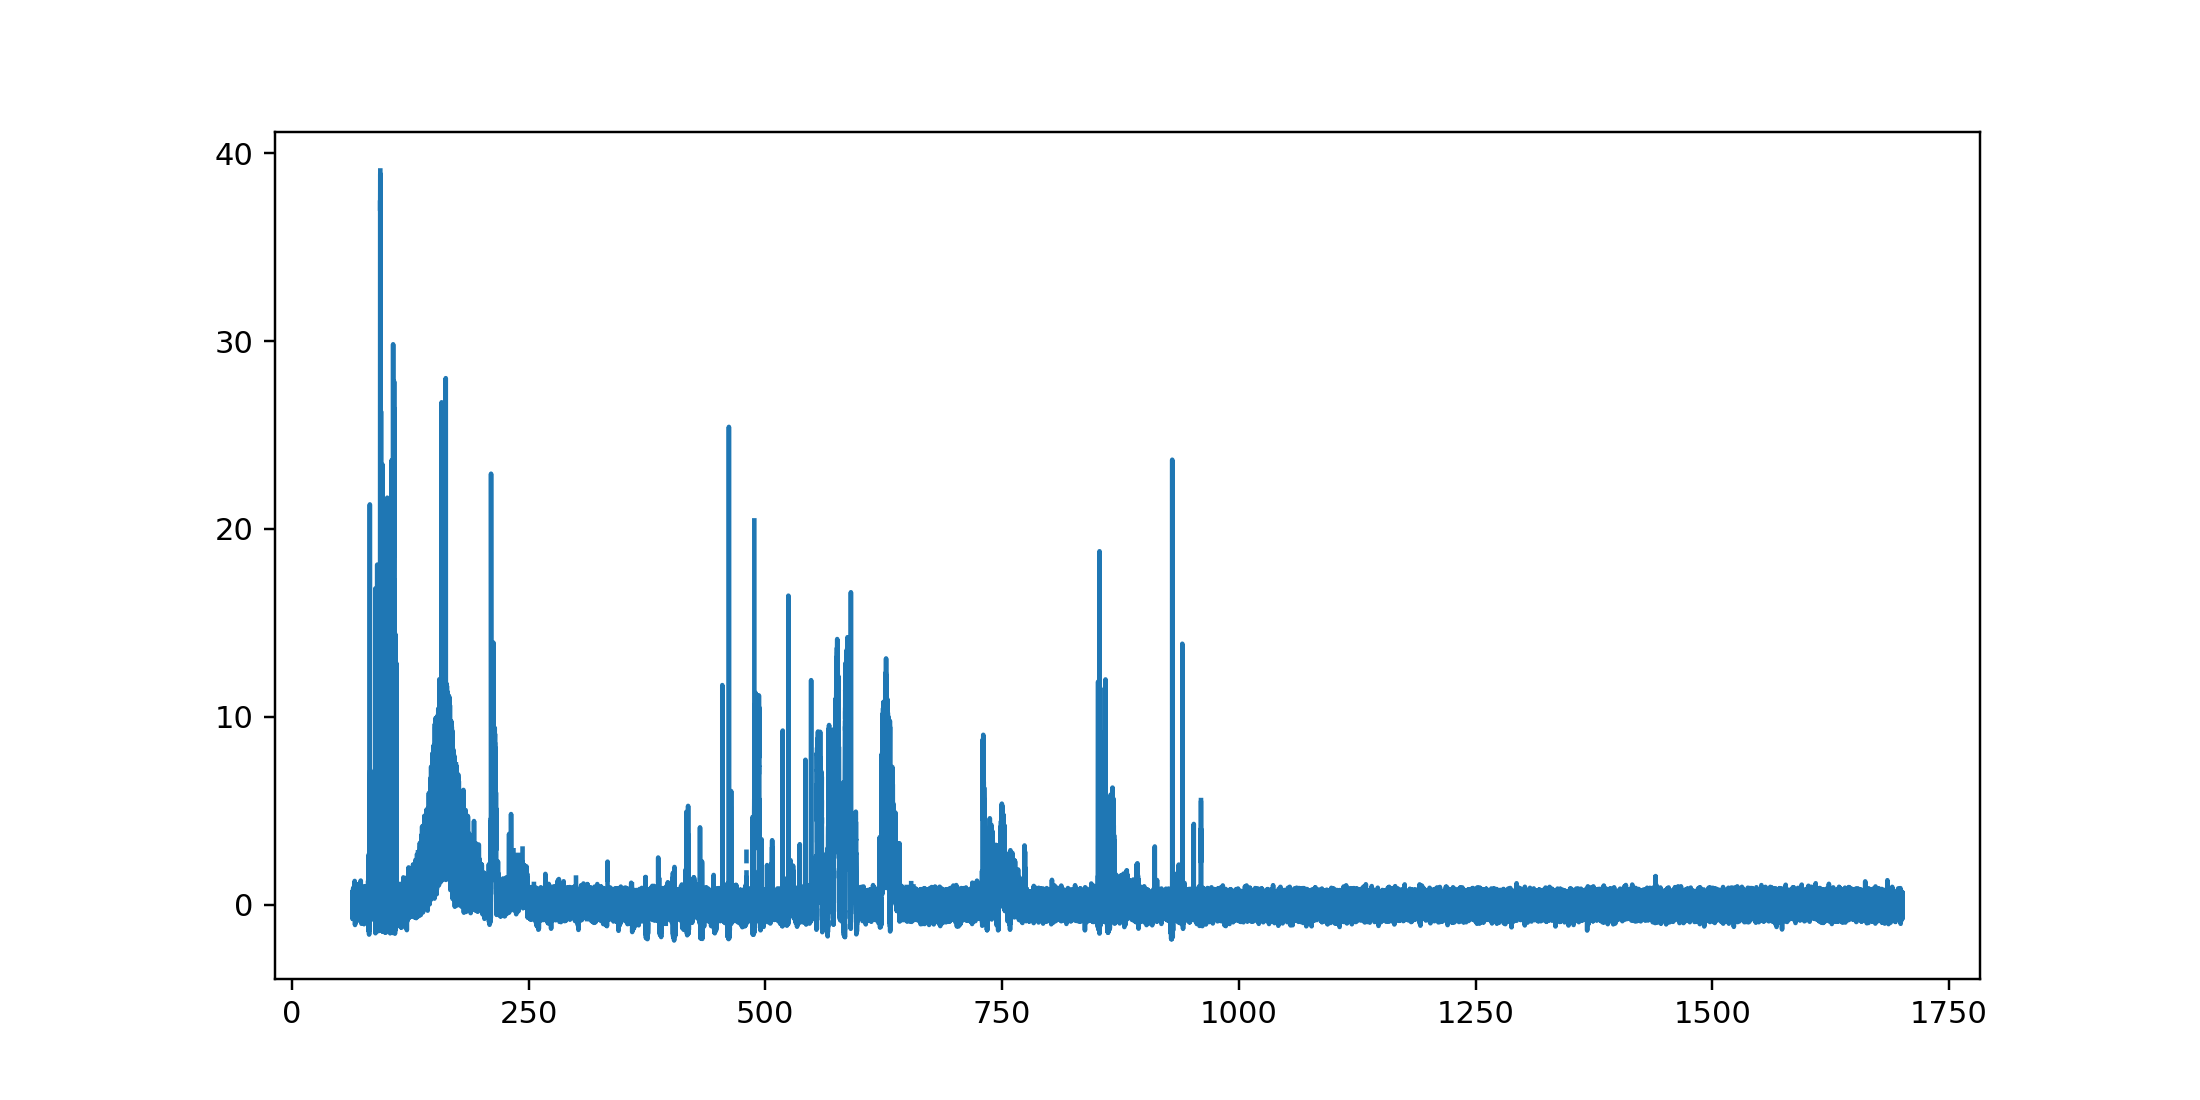

/Users/jaguirre/opt/anaconda3/envs/MRT/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
plt.figure(figsize=(10,5))
#plt.plot(f1ant_all, dB(p1ant_all))
plt.plot(f1ant_all, dB(p1ant_all/fl1ant_all))
plt.show()

In [33]:
from astropy import units as u

In [34]:
(281*u.mm).to(u.imperial.inch)

<Quantity 11.06299213 inch>